In [1]:
from scipy.special import jv
from scipy.optimize import curve_fit
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
x_r = [0.130,0.138,0.146,0.156,0.167,0.179,0.231,0.378,0.449,0.722,1.035]
x_v = [0.155,0.164,0.174,0.185,0.198,0.213,0.275,0.449,0.534,0.858,1.231]
x_b = [0.174,0.184,0.196,0.209,0.223,0.240,0.310,0.507,0.602,0.967,1.388]
y_r = [0.916,0.897,0.836,0.793,0.777,0.725,0.679,0.573,0.464,0.249,0.131]
y_v = [0.877,0.869,0.809,0.807,0.773,0.723,0.633,0.467,0.437,0.393,0.204]
y_b =[0.928,0.825,0.814,0.796,0.777,0.717,0.606,0.424,0.409,0.355,0.130]

In [3]:
def visibility(x, trou, c1=2, c2=pi): # diametre du trou en mm
    return abs(c1*jv(1, c2*x*trou)/(c2*x*trou))

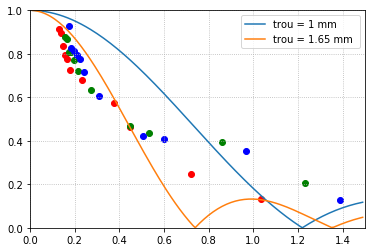

In [4]:
scatter(x_r, y_r, color='red')
scatter(x_v, y_v, color='green')
scatter(x_b, y_b, color='blue')
xlim(0, 1.5)
ylim(0, 1)
grid(True, linestyle=':')
x_mesu = hstack((x_r, x_v, x_b))
y_mesu = hstack((y_r, y_v, y_b))
popt, pcov = curve_fit(visibility, x_mesu, y_mesu, (1))
x = arange(150)/100
plot(x, visibility(x, 1), label='trou = %s mm '%1)
plot(x, visibility(x, popt[0]), label='trou = %s mm '%round(popt[0], 2))
legend()